In [5]:
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
X_train = np.load('data.npy')

In [3]:
X_train[0]

array([2.61755903, 2.49389168])

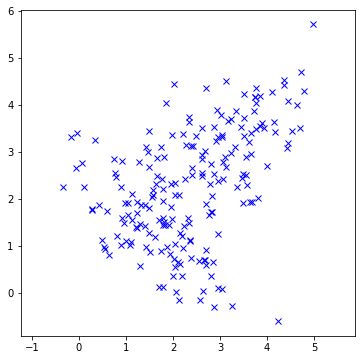

In [6]:
plt.figure(figsize=(6,6))
plt.plot(X_train[:,0], X_train[:,1], 'bx')
plt.axis('equal')
plt.show()

- Observe that the data is not clearly clustered
- => Use GMM to perform clustering 

In [41]:
# Select K components
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
from sklearn import metrics
list_sil = [] # chua danh sach cac gia tri sil
K = range(2,8) # chua danh sach cac k
for k in K:
    gmm = GaussianMixture(n_components=k) # 2, 3, 4...
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    # k = 2 => 0,1
    # k = 3 => 0, 1, 2
    sil = metrics.silhouette_score(X_train, labels, metric='euclidean')
    list_sil.append(sil)

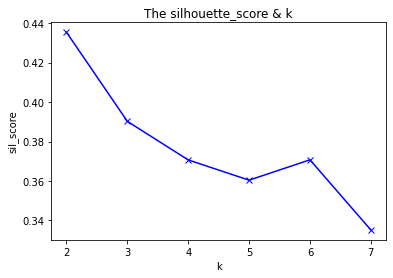

In [42]:
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

In [43]:
# select components = 2
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

In [44]:
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[0.52279335 0.47720665]
[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]
[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


In [45]:
types = gmm.predict(X_train)
# Which cluster does the sample belong to? ? 0, 1
# X[x,y], loai =>

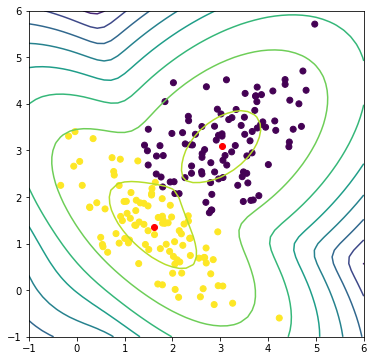

In [46]:
# plot mixture of Gaussians
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T # ma tran [[x,y]] ~ X_train
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=types) # 0, 1
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color="red")
plt.show()